In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
df.shape

(1599, 12)

In [21]:
#Seperating the dataset as response variable and feature variabes
X = df.drop ('quality',axis =1 )
y= df['quality']

In [22]:
#Applying Standard scaling to get optimized result
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [23]:
X_scale

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [24]:
#Train and Test splitting of data into 80-20 split ratio
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size=0.3)


In [25]:
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

In [26]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1119, 11) (240, 11) (240, 11) (1119,) (240,) (240,)


In [40]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(256, activation='sigmoid', input_shape=(11,)),
    layers.Dense(256, activation='sigmoid'),    
    layers.Dense(128, activation='relu'),
    layers.Dense(1),
])

In [41]:
model.compile(
    optimizer="adam",
    loss="mae",
    metrics=['accuracy']
)

In [42]:
hist_1 = model.fit(
    X_train, y_train,
    batch_size = 128,
    epochs = 200,
    validation_data=(X_val, y_val)
)

Epoch 1/200
9/9 [==============================] - 1s 26ms/step - loss: 2.2341 - accuracy: 0.0000e+00 - val_loss: 1.5592 - val_accuracy: 0.0000e+00
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 0.9785 - accuracy: 0.0000e+00 - val_loss: 0.9121 - val_accuracy: 0.0000e+00
Epoch 3/200
9/9 [==============================] - 0s 10ms/step - loss: 0.7627 - accuracy: 0.0000e+00 - val_loss: 0.7564 - val_accuracy: 0.0000e+00
Epoch 4/200
9/9 [==============================] - 0s 10ms/step - loss: 0.7072 - accuracy: 0.0000e+00 - val_loss: 0.7282 - val_accuracy: 0.0000e+00
Epoch 5/200
9/9 [==============================] - 0s 10ms/step - loss: 0.6997 - accuracy: 0.0000e+00 - val_loss: 0.7049 - val_accuracy: 0.0000e+00
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: 0.6766 - accuracy: 0.0000e+00 - val_loss: 0.7015 - val_accuracy: 0.0000e+00
Epoch 7/200
9/9 [==============================] - 0s 9ms/step - loss: 0.6678 - accuracy: 0.0000e+00 - val_loss: 0

In [43]:
accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

8/8 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.0000e+00
Test Accuracy: [0.5008746385574341, 0.0]


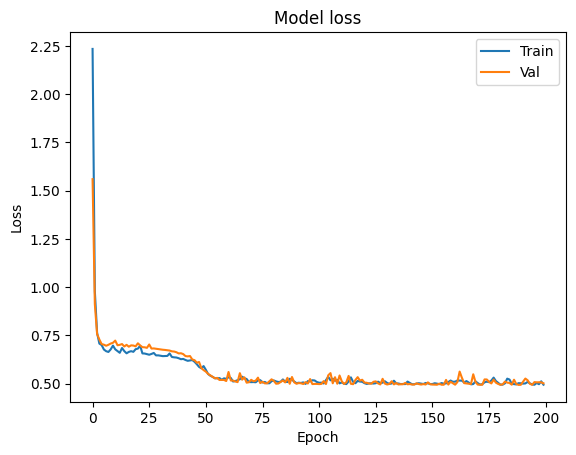

In [44]:
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()